<a href="https://colab.research.google.com/github/rnoxy/dl_uwr/blob/summer2024/Assignments/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 2

**Submission deadlines:**
- get at least 4 points by 12.03.2024 (Tue groups)
- get at least next 4 points by 19.03.2024 (Tue groups)
- remaining points: by 26.03.2024 (Tue groups)

**Points:** Aim to get 16 out of 18+ possible points

## Submission instructions
The class is held on-site in lab rooms. Please prepare you notebook on your computer or anywhere in the cloud (try using DeepNote or Google Colab).

Make sure you know all the questions and answers, and that the notebook contains results; before presentation do `Runtime -> Restart and run all`
![Picture title](image-20220302-183151.png)

We provide starter code, however you are not required to use it as long as you properly solve the tasks.

## Extra points

You can earn extra 2 points if all your experiments are logged with [Weights and Biases](http://wandb.ai)


# Problems


## Problem 1 [1p]:

Let's see why GPUs are useful in deep learning. Compare matrix multiplication speed for a few matrix shapes when implemented:
1. as loops in Python
2. using np.einsum
3. using numpy on CPU
4. using pytorch on CPU
5. using pytorch on GPU

Finally, consider two square matrices, $A$ and $B$. We have 4 possibilities of multiplying them or their transpositions:
1. $AB$
2. $A^TB$
3. $AB^T$
4. $A^TB^T$

Which option is the fastest? Why?

## Problem 2: Stochastic Gradient Descent (training MNIST digits) [3p]

We provide below starter code that trains a classification model (with softmat + cross entropy loss). Alternatively, implement your own training loop and use it to solve this problem jointly with the next one.

Implement the following additions to the SGD code provided:
  1. **[1p]** momentum
  2. **[1p]** learning rate schedule
  3. **[1p]** weight decay, in which we additionally minimize for each weight matrix (but typically not the bias) the sum of its elements squared. One way to implement it is to use the function `model.named_parameters` and select all parameters whose names contain "`weight`" rather than "`bias`".

## Problem 3: Tuning the Network for MNIST [3p]

Tune the following network to reach **validation error rate below 1.9%**.
This should result in a **test error rate below 2%**. To
tune the network you will need to:
1. Choose the number of layers (more than 1, less than 5);
2. Choose the number of neurons in each layer (more than 100,
    less than 5000);
3. Pick proper weight initialization;
4. Pick proper learning rate schedule (need to decay over time,
    a good range to check on MNIST is about 1e-2 ... 1e-1 at the beginning and
    half of that after 10000 batches);
5. Pick a momentum constant (probably a constant one will be OK).


Please note: there are many hyperparameter settings that give the desired answer, some may require tuning all hyperparameters, some only a few.

## Problem 4: Convolutional Network [2p]

Use convolutional and max-pooling layers (`Conv2d`, `Max_pool2d` or their functional variants) and (without dropout) get a test error rate below 1.5%.

## Problem 5: Data Augmentation [1p]

Apply data augmentation methods (e.g. rotations, noise, crops) when training networks on MNIST, to significantly reduce test error rate for your network. You can use functions from the [torchvision.transforms](http://pytorch.org/docs/master/torchvision/transforms.html) module.

Please note: when using random transformations during training, make sure they are re-computed in every epoch. Consider applying augmentation either in the training loop or in the `InMemDataLoader`. For the second case, function `InMemDataLoader.__iter__` is a good place to do it.


## Problem 6: Dropout [2p]

Learn about dropout:

- implement a **dropout** layer
- or use `nn.Dropout` (then the exercise is worth 1.5 points)

and try to train a
network getting below 1.5% test error rates with dropout, but no convolutions, or below 1% when dropout is used jointly with convolutions!

Remember to turn off dropout during testing, using `model.train()` and `model.eval()`!

Hint: Use [torch.nn.functional.dropout](http://pytorch.org/docs/master/nn.html#torch.nn.functional.dropout).

Details: http://arxiv.org/pdf/1207.0580.pdf.

## Problem 7: Batch Normalization [2p]

[Batch Normalization](https://arxiv.org/abs/1502.03167) helps training neural networks because it [normalizes layer activation magnitudes](https://papers.nips.cc/paper/7515-how-does-batch-normalization-help-optimization.pdf). It typically allows to train networks faster and/or with higher learning rates, lessens the importance
of initialization and might eliminate the need for Dropout.

Implement Batch Normalization and compare with regular training of MNIST models.

Remember to use the batch statistics during model training and to use an average of training batch statistics during model evaluation. For details please consult the paper.

## Problem 8: Norm Constraints [1p]

Implement norm constraints, i.e. instead of weight decay, that tries to set all weights to small values, apply a limit on the total
norm of connections incoming to a neuron. In our case, this
corresponds to clipping the norm of *rows* of weight
matrices. An easy way of implementing it is to make a gradient
step, then look at the norm of rows and scale down those that are
over the threshold (this technique is called "projected gradient descent").

Please consult the Dropout paper (http://arxiv.org/pdf/1207.0580.pdf) for details.

## Problem 9: Hyperparameter tuner [2p]

Implement a hyper-parameter tuner able to optimize the learning rate schedule, number of neurons, and similar hyperparameters. To start, use a random search (please see http://jmlr.csail.mit.edu/papers/volume13/bergstra12a/bergstra12a.pdf and especially Fig 1. for intuitions on why random search is better than grid search). It may be a good idea to use a fixed maximum number of epochs (or training time) for each optimization trial to prevent selecting hyperparameters that yield slowly converging solutions. A good result will be a set of hyperparameters that reach on MNIST solutions with test errors less than $1.3\%$ in no more than 50 epochs.

## Problem 10: Pruning [1p]

Prune the MNIST network to retain validation accuracy no worse than 0.1 percentage point at maximum sparsity (maximal number of weights removed from the network).

One way to do it is to
1. train the network,
2. set to zero the smallest weights (typically you can zero up to 50% of weights)
3. retrain the network, keeping the zeroed weights zeroed, and repeat

## Problem 11: Other tricks [1p-many]

The neural network literature is full of tricks for training neural networks. Find some and implement them. Please note: the number of points depends on the hardness of the extension you want to implement. If in doubt, consult the TA beforehand

# Starter code

The code below trains a SoftMax regression model in PyTorch. It can easily be extended into a full multilayer neural network.

In [1]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.5 MB/s eta 0:00:00


In [2]:
%matplotlib inline

In [3]:
import os
import time

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from tqdm.auto import tqdm

import torch
import torch.nn.functional as F
import torchvision.datasets
from torch import nn

import wandb

# cutout model

In [ ]:
# Demonstration for problem 1
start_time = time.process_time()

#3x3 matrix
X = np.random.rand(1000, 1000)

# 3x4 matrix
Y = np.random.rand(1000, 1200)

# result is 3x4
result = np.zeros((1000, 1200))

# iterate through rows of X
for i in range(len(X)):
   # iterate through columns of Y
   for j in range(len(Y[0])):
       # iterate through rows of Y
       for k in range(len(Y)):
           result[i][j] += X[i][k] * Y[k][j]

t1_stop = time.process_time()
print(f"Elapsed time (loops) in seconds: {t1_stop-start_time}\n")

start_time = time.process_time()

sum = np.einsum('ij,jk->ik', X, Y)
t1_stop = time.process_time()

print(f"\neinsum: {sum}\n calculated in {t1_stop-start_time} seconds")

start_time = time.process_time()
sum1 = np.matmul(X,Y)
t1_stop = time.process_time()

print(f"\nnp matmul: {sum1}\n calculated in {t1_stop-start_time} seconds")

Atensor = torch.from_numpy(X)
Btensor = torch.from_numpy(Y)

start_time = time.process_time()
sum2 = torch.matmul(Atensor, Btensor)
t1_stop = time.process_time()

print(f"\ntorch matmul CPU: {sum2}\n calculated in {t1_stop-start_time} seconds")

AGensor, BGensor = Atensor.cuda().float(), Btensor.cuda().float()

start_time = time.process_time()
sum3 = torch.matmul(AGensor, BGensor)
t1_stop = time.process_time()

print(f"torch matmul GPU: {sum3}\n calculated in {t1_stop-start_time} seconds")


Elapsed time (loops) in seconds: 1211.7337686659998

[251.45791522 261.47727154 257.86096051 ... 258.73790738 253.63577411
 248.53503001]
[246.85533956 255.02956954 256.83092125 ... 253.11711718 244.93931658
 247.3491306 ]
[245.38035476 251.35922253 248.58902013 ... 253.79609423 245.83098765
 242.60028627]
[243.95385314 242.86790792 239.5250799  ... 246.72425054 244.32507792
 237.95532778]
[252.73195436 258.97925309 259.86853315 ... 256.19449234 247.00355014
 252.33760164]
[239.86790054 247.94327064 246.18740113 ... 241.78117466 241.02794453
 237.93309793]
[247.90857636 259.53238204 258.43096645 ... 252.53387444 246.69561209
 245.79844511]
[243.00999343 250.43151142 253.0371996  ... 248.8582035  249.92286961
 247.00770004]
[243.91495816 248.29851246 245.76988007 ... 248.47998381 242.05410694
 243.54305581]
[247.89984847 253.52146771 250.85875488 ... 250.76022212 251.77350278
 246.78095428]
[248.82876809 257.56711513 254.4164958  ... 250.30995807 245.11208122
 240.26322021]
[247.6573134

In [4]:
def compute_error_rate(model, data_loader, device="cpu"):
    """Evaluate model on all samples from the data loader.
    """
    # Put the model in eval mode, and move to the evaluation device.
    model.eval()
    model.to(device)
    if isinstance(data_loader, InMemDataLoader):
        data_loader.to(device)

    num_errs = 0.0
    num_examples = 0
    # we don't need gradient during eval!
    with torch.no_grad():
        for x, y in data_loader:
            x = x.to(device)
            y = y.to(device)
            outputs = model.forward(x)
            _, predictions = outputs.data.max(dim=1)
            num_errs += (predictions != y.data).sum().item()
            num_examples += x.size(0)
    return num_errs / num_examples


def plot_history(history):
    """Helper to plot the trainig progress over time."""
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    train_loss = np.array(history["train_losses"])
    plt.semilogy(np.arange(train_loss.shape[0]), train_loss, label="batch train loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    train_errs = np.array(history["train_errs"])
    plt.plot(np.arange(train_errs.shape[0]), train_errs, label="batch train error rate")
    val_errs = np.array(history["val_errs"])
    plt.plot(val_errs[:, 0], val_errs[:, 1], label="validation error rate", color="r")
    plt.ylim(0, 0.20)
    plt.legend()

## Data loading

Training speed is important. By default, data is loaded on the CPU, then shipped in batches to the GPU. For this exercise, we will load the full dataset onto the GPU, which speeds up training.

In [5]:
class InMemDataLoader(object):
    """
    A data loader that keeps all data in CPU or GPU memory.
    """

    __initialized = False

    def __init__(
        self,
        dataset,
        batch_size=1,
        shuffle=False,
        sampler=None,
        batch_sampler=None,
        drop_last=False,
    ):
        """A torch dataloader that fetches data from memory."""
        batches = []
        for i in tqdm(range(len(dataset))):
            batch = [torch.tensor(t) for t in dataset[i]]
            batches.append(batch)
        tensors = [torch.stack(ts) for ts in zip(*batches)]
        dataset = torch.utils.data.TensorDataset(*tensors)
        self.dataset = dataset
        self.batch_size = batch_size
        self.drop_last = drop_last

        if batch_sampler is not None:
            if batch_size > 1 or shuffle or sampler is not None or drop_last:
                raise ValueError(
                    "batch_sampler option is mutually exclusive "
                    "with batch_size, shuffle, sampler, and "
                    "drop_last"
                )
            self.batch_size = None
            self.drop_last = None

        if sampler is not None and shuffle:
            raise ValueError("sampler option is mutually exclusive with " "shuffle")

        if batch_sampler is None:
            if sampler is None:
                if shuffle:
                    sampler = torch.utils.data.RandomSampler(dataset)
                else:
                    sampler = torch.utils.data.SequentialSampler(dataset)
            batch_sampler = torch.utils.data.BatchSampler(
                sampler, batch_size, drop_last
            )

        self.sampler = sampler
        self.batch_sampler = batch_sampler
        self.__initialized = True

    def __setattr__(self, attr, val):
        if self.__initialized and attr in ("batch_size", "sampler", "drop_last"):
            raise ValueError(
                "{} attribute should not be set after {} is "
                "initialized".format(attr, self.__class__.__name__)
            )

        super(InMemDataLoader, self).__setattr__(attr, val)

    def __iter__(self):
        for batch_indices in self.batch_sampler:
            yield self.dataset[batch_indices]

    def __len__(self):
        return len(self.batch_sampler)

    def to(self, device):
        self.dataset.tensors = tuple(t.to(device) for t in self.dataset.tensors)
        return self

```python
# Monkey-patch MNIST to use a more robust MNIST mirror
torchvision.datasets.MNIST.resources = [
    (
        "https://web.archive.org/web/20150906081542/http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz",
        "f68b3c2dcbeaaa9fbdd348bbdeb94873",
    ),
    (
        "https://web.archive.org/web/20150906081542/http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz",
        "d53e105ee54ea40749a09fcbcd1e9432",
    ),
    (
        "https://web.archive.org/web/20150906081542/http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz",
        "9fb629c4189551a2d022fa330f9573f3",
    ),
    (
        "https://web.archive.org/web/20150906081542/http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz",
        "ec29112dd5afa0611ce80d1b7f02629c",
    ),
]
```

In [6]:
# Load the data

batch_size = 128
data_path = "./data"

transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

_test = torchvision.datasets.MNIST(
    data_path, train=False, download=True, transform=transform
)

# Load training data, split into train and valid sets
_train = torchvision.datasets.MNIST(
    data_path, train=True, download=True, transform=transform
)
_train.data = _train.data[:50000]
_train.targets = _train.targets[:50000]

_valid = torchvision.datasets.MNIST(
    data_path, train=True, download=True, transform=transform
)
_valid.data = _valid.data[50000:]
_valid.targets = _valid.targets[50000:]

mnist_loaders = {
    "train": InMemDataLoader(_train, batch_size=batch_size, shuffle=True),
    "valid": InMemDataLoader(_valid, batch_size=batch_size, shuffle=False),
    "test": InMemDataLoader(_test, batch_size=batch_size, shuffle=False),
}

100%|██████████| 9912422/9912422 [00:00<00:00, 90146424.44it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 23007729.12it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27018155.88it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12410767.93it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/50000 [00:00<?, ?it/s]

<ipython-input-5-f2b633125296>:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = [torch.tensor(t) for t in dataset[i]]


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

## SGD implementation

We provide below a scaffolding for SGD. You will need to fill the TODOs while solving the assignments.

In [7]:
def SGD(
    model,
    data_loaders,
    alpha=1e-4,
    epsilon=0.0,
    decay=0.0,
    num_epochs=1,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cpu",
    alpha_decrease=5,
    use_norm=False,
    run_name=""
):

    # Put the model in train mode, and move to the evaluation device.
    model.train()
    model.to(device)
    for data_loader in data_loaders.values():
        if isinstance(data_loader, InMemDataLoader):
            data_loader.to(device)

    wandb.init(project="DeepLearningCourse", name=run_name)

    wandb.watch(model)

    #
    # TODO for Problem 2.3: Initialize momentum variables
    # Hint: You need one velocity matrix for each parameter
    #
    velocities = [torch.zeros(p.shape, device=device) for p in model.parameters()]
    #
    iter_ = 0
    epoch = 0
    best_params = None
    best_val_err = np.inf
    history = {"train_losses": [], "train_errs": [], "val_errs": []}
    print("Training the model!")
    print("Interrupt at any time to evaluate the best validation model so far.")

    momentum_schedule = [0.5, 0.9] # defined one low momentum and one high momentum
    momentum_index = 0

    try:
        tstart = time.time()
        siter = iter_
        while epoch < num_epochs:
            model.train()
            epoch += 1
            if epoch > max_num_epochs:
                break
            #
            # TODO: You can implement learning rate control here (it is updated
            # once per epoch), or below in the loop over minibatches.
            #

            if epoch > 9 and epoch % alpha_decrease == 0: # adjust learning rate in the early epoch might not be useful. therefore, I adjust it after 10th epoch
              #alpha /= 2
              alpha *= 0.9

            if epoch in [10, 20]:
                momentum_index += 1
                epsilon = momentum_schedule[min(momentum_index, len(momentum_schedule) - 1)]

            for x, y in data_loaders["train"]:
                x = x.to(device)
                y = y.to(device)
                iter_ += 1
                # This calls the `forward` function: https://pytorch.org/tutorials/beginner/examples_nn/two_layer_net_module.html
                out = model(x)
                loss = model.loss(out, y)
                loss.backward()
                _, predictions = out.max(dim=1)
                batch_err_rate = (predictions != y).sum().item() / out.size(0)

                history["train_losses"].append(loss.item())
                history["train_errs"].append(batch_err_rate)

                # disable gradient computations - we do not want torch to
                # backpropagate through the gradient application!
                with torch.no_grad():
                    for (name, p), v in zip(model.named_parameters(), velocities):
                        if "weight" in name:
                            #
                            # TODO for Problem 2.3: Implement weight decay (L2 regularization
                            # on weights by changing the gradients
                            # p.grad += TODO
                            #
                            if not use_norm:
                                p.grad += 2 * decay * p
                            pass

                        #
                        # TODO for Problem 2.2: Implement a learning rate schedule
                        # Hint: You can use the iteration or epoch counters
                        # alpha = TODO
                        #

                        #
                        # TODO for Problem 2.1: If needed, implement here a momentum schedule
                        # epsilon = TODO
                        #

                        #
                        # TODO for Problem 2.1: Implement velocity updates for momentum
                        # lease make sure to modify the contents of v, not the v pointer!!!
                        #
                        # v[...] = TODO
                        v_prev = v[...] # before the next calculation, store the previous one
                        v[...] = epsilon * v[...] - alpha * p.grad # to adjust the velocity direction
                        p += -epsilon * v_prev + (1+epsilon) * v[...] # dampen the effect of the previous and boost the effect of current one

                        #
                        # TODO for Problem 2: Set a more sensible learning rule here,
                        #       using your learning rate schedule and momentum
                        #
                        #p -= alpha * p.grad

                        # Zero gradients for the next iteration
                        p.grad.zero_()

                        # Norm constraints
                        if use_norm and "weight" in name:
                          norm_threshold = 0.8
                          # get Eucladian norm for each row
                          norm = torch.norm(p, dim=1)
                          # create a binary mask
                          _tmp = (norm > norm_threshold).float()
                          # values in _tmp scaled to lie between 0 and 1
                          _tmp /= norm_threshold
                          # update the weight
                          p = torch.diag(_tmp)@p

                if iter_ % log_every == 0:
                    num_iter = iter_ - siter + 1
                    print(
                        "Minibatch {0: >6}  | loss {1: >5.2f} | err rate {2: >5.2f}%, steps/s {3: >5.2f}".format(
                            iter_,
                            loss.item(),
                            batch_err_rate * 100.0,
                            num_iter / (time.time() - tstart),
                        )
                    )
                    tstart = time.time()

                # Log loss and error rate
                wandb.log({"loss": loss.item(), "error_rate": batch_err_rate})

            val_err_rate = compute_error_rate(model, data_loaders["valid"], device)
            history["val_errs"].append((iter_, val_err_rate))

            # Log validation error rate
            wandb.log({"val_error_rate": val_err_rate})

            if val_err_rate < best_val_err:
                # Adjust num of epochs
                num_epochs = int(np.maximum(num_epochs, epoch * patience_expansion + 1))
                best_epoch = epoch
                best_val_err = val_err_rate
                best_params = [p.detach().cpu() for p in model.parameters()]
            clear_output(True)
            m = "After epoch {0: >2} | valid err rate: {1: >5.2f}% | doing {2: >3} epochs".format(
                epoch, val_err_rate * 100.0, num_epochs
            )
            print("{0}\n{1}\n{0}".format("-" * len(m), m))

    except KeyboardInterrupt:
        pass

    if best_params is not None:
        print("\nLoading best params on validation set (epoch %d)\n" % (best_epoch))
        with torch.no_grad():
            for param, best_param in zip(model.parameters(), best_params):
                param[...] = best_param

    wandb.log({"best_epoch": best_epoch})
    wandb.finish()

    plot_history(history)

# Problem 2

----------------------------------------------------------
After epoch 30 | valid err rate:  7.89% | doing  41 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 27)



best_epoch,▁
error_rate,█▆▆▅▆▃▃▅▃▅▅▅▄▄▃▂▃▄▃▃▅▂▂▄▃▄▄▂▂▃▃▅▃▅▃▃▃▃▂▁
loss,█▄▅▄▄▂▂▃▃▂▃▄▂▂▃▁▂▃▁▂▂▁▁▂▁▂▂▁▁▁▂▂▂▂▁▂▁▂▁▁
val_error_rate,█▆▅▅▄▄▄▅▄▃▄▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▂▁▁
best_epoch,27
error_rate,0.05
loss,0.26725
val_error_rate,0.0789


-------------------------------------------
Test error rate: 8.020%, training took 63s.
-------------------------------------------


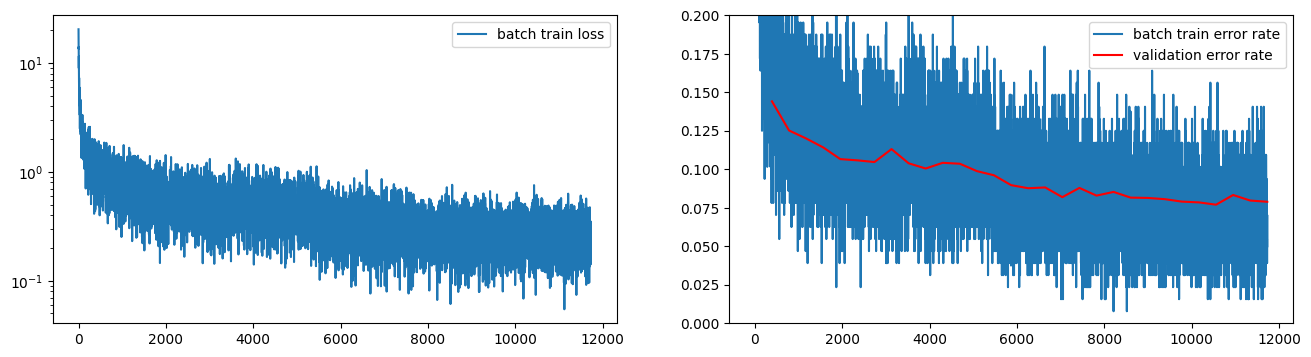

In [10]:
class Model(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Model, self).__init__()
        self.layers = nn.Sequential(*args, **kwargs)

    def forward(self, X):
        X = X.view(X.size(0), -1)
        return self.layers.forward(X)

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)


model = Model(nn.Linear(28 * 28, 10))

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            p.normal_(0, 0.5)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device="cuda", run_name="SGD")


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

# Problem 3

----------------------------------------------------------
After epoch 28 | valid err rate:  2.48% | doing  28 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 18)



best_epoch,▁
error_rate,█▄▂▁▂▂▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_error_rate,█▆▄▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,18
error_rate,0.0
loss,0.00332
val_error_rate,0.0248


-------------------------------------------
Test error rate: 2.280%, training took 52s.
-------------------------------------------


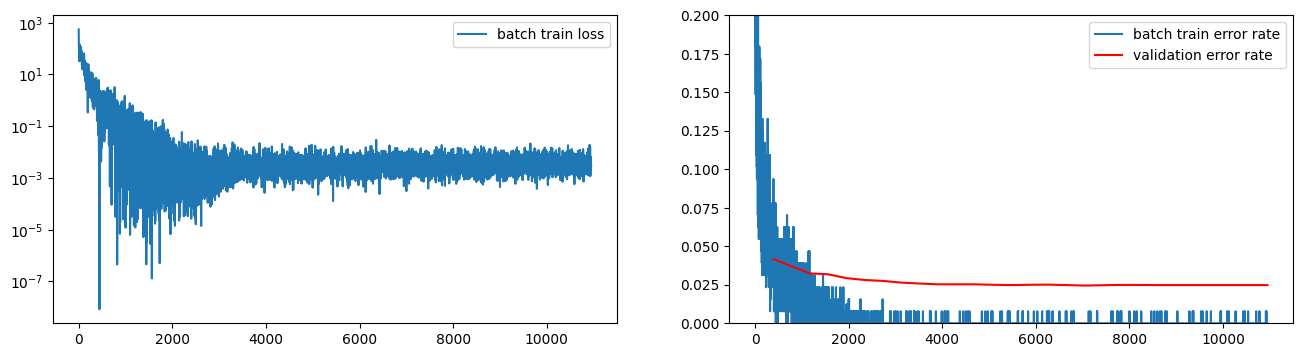

In [ ]:
model = Model(nn.Linear(28 * 28, 2000),
    nn.ReLU(),
    nn.Linear(2000, 100),)

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            p.normal_(0, 0.5)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
SGD(model, mnist_loaders, alpha=0.01, max_num_epochs=60, decay=0.0004, device='cuda', epsilon=0.975, run_name="Network Tuning") # chose decay a lower one to prevent overfitting, device='cuda'
# constant 1 for epsilon performed really bad so I decreased it a bit.

test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

# Problem 4

----------------------------------------------------------
After epoch 50 | valid err rate:  0.72% | doing  50 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 11)



best_epoch,▁
error_rate,▅█▁▁▁▁▁▅▁▁▁▁▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅▁▁
loss,▅█▂▂▁▁▂▃▁▁▁▂▂▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▂▁▁▁▁▁▂▁▁
val_error_rate,█▅▅▅▄▄▃▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,11
error_rate,0.0
loss,0.00396
val_error_rate,0.0072


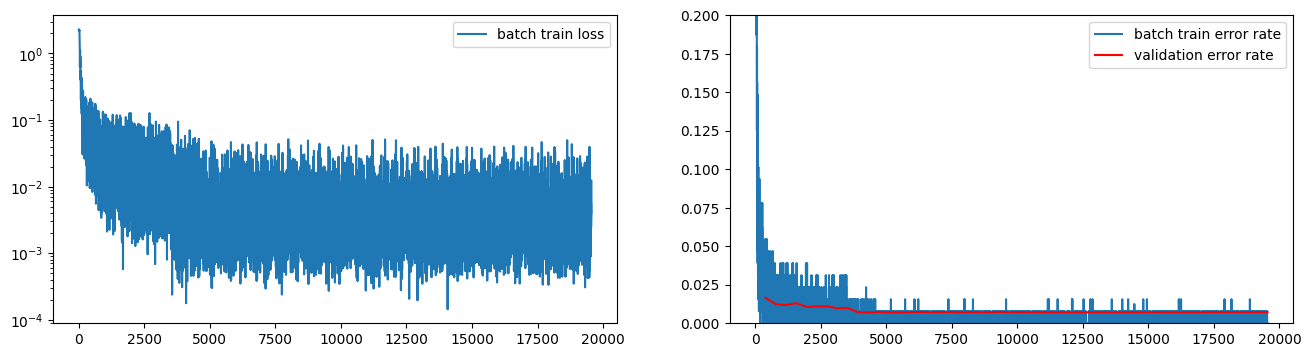

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        kernelSize = 5
        # creating a conv layer takes grayscale img and returns 32 as output channels
        # gets the most important information as 2x2 size in max pooling
        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, kernelSize, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernelSize, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            )
        self.linear = nn.Sequential(
            nn.Linear(64 * kernelSize * kernelSize,400),
            nn.ReLU(),
            nn.Linear(400,100),
            nn.ReLU(),
            nn.Linear(100,10),
            )

    def forward(self, X):
        out = self.conv(X)
        out = out.reshape(out.size(0), -1)
        out = self.linear(out)
        return out

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)


model = ConvNet()

results = []
iters = 1

for _ in range(iters):
  t_start = time.time()
  SGD(model, mnist_loaders, alpha=0.01, epsilon=0.975, max_num_epochs=60, num_epochs=50, device='cuda',
       decay=0.0005, run_name="Convolutional Network") #device='cuda'
  test_err_rate = compute_error_rate(model, mnist_loaders["test"])
  results.append(test_err_rate)

# Problem 6

----------------------------------------------------------
After epoch 60 | valid err rate:  1.53% | doing  60 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 21)



best_epoch,▁
error_rate,█▄▃▂▂▃▂▂▂▁▁▁▁▁▂▁▁▂▁▁▁▂▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁
loss,█▄▃▂▂▂▂▁▂▁▁▁▂▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁
val_error_rate,█▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,21
error_rate,0.0
loss,0.01111
val_error_rate,0.0153


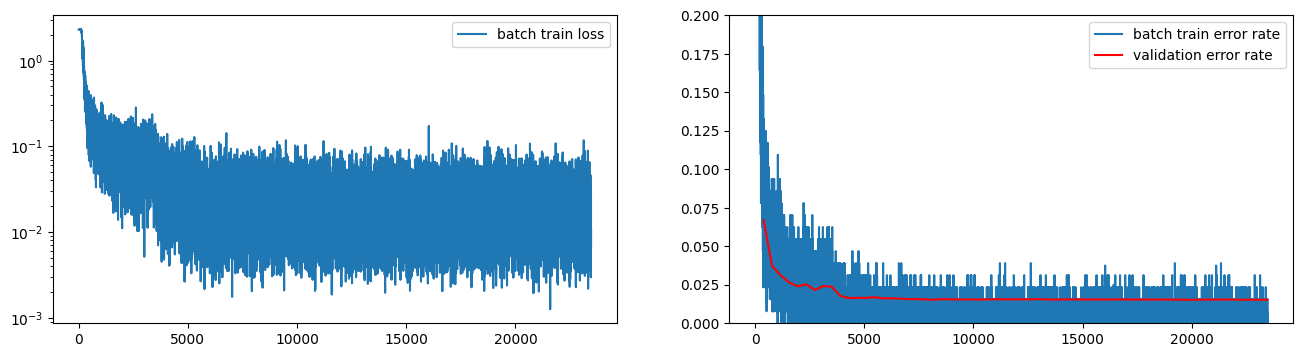

In [ ]:
class DropNet(nn.Module):
    def __init__(self):
        super(DropNet, self).__init__()
        self.linear1 = nn.Sequential(
            nn.Linear(28*28,3000),
            nn.ReLU(),
            )
        self.linear2 = nn.Sequential(
            nn.Linear(3000,500),
            nn.ReLU(),
        )
        self.linear3 = nn.Sequential(
            nn.Linear(500,100),
            nn.ReLU(),
            nn.Linear(100,10),
        )

    def forward(self, X):
        X = X.view(X.size(0), -1)
        out = self.linear1(X)
        out = self.dropout(out, 0.4)
        out = self.linear2(out)
        out = self.dropout(out, 0.15)
        out = self.linear3(out)
        return out

    def dropout(self, X, p):
        if self.training:
            binomial = torch.empty_like(X).uniform_(0, 1) > p
            # to ensure that the expected value of the output remains the same as the input
            return X * binomial / (1 - p)
        else:
            return X

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

"""model = Model(
    nn.Linear(28*28, 2000),
    nn.Dropout(0.2),
    nn.ReLU(),
    nn.Linear(2000, 2000),
    nn.Dropout(0.5),
    nn.ReLU(),
    nn.Linear(2000, 10)
    )"""

model = DropNet()

results = []
iters = 1
with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            p.normal_(0, 0.01)
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

for _ in range(iters):
  t_start = time.time()
  SGD(model, mnist_loaders, alpha=0.005, epsilon=0.99, num_epochs=60,
    max_num_epochs=100, device='cuda', decay=0.0005, run_name="DropNet") #device='cuda',
  test_err_rate = compute_error_rate(model, mnist_loaders["test"], "cuda") #, "cuda"
  results.append(test_err_rate)

# Problem 5

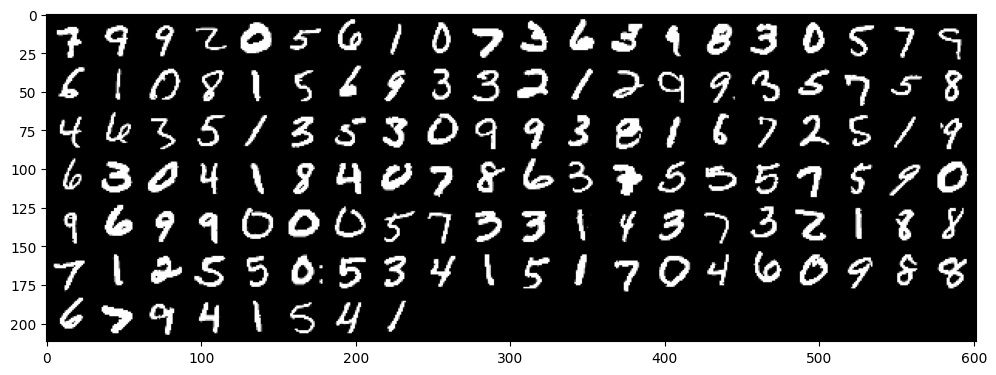

In [ ]:
images = list(mnist_loaders["train"])[0][0].to("cpu")

grid = torchvision.utils.make_grid(images, nrow = 20, padding = 2)
plt.figure(figsize = (12, 12))
plt.imshow(np.transpose(grid, (1, 2, 0)))

----------------------------------------------------------
After epoch 50 | valid err rate:  0.81% | doing  50 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 11)



best_epoch,▁
error_rate,█▃▁▁▁▁▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▁▁▁▁▁▁▁▁▁▃▁▁▁▁▁
loss,█▄▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_error_rate,█▄▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,11
error_rate,0.0
loss,0.00067
val_error_rate,0.0081


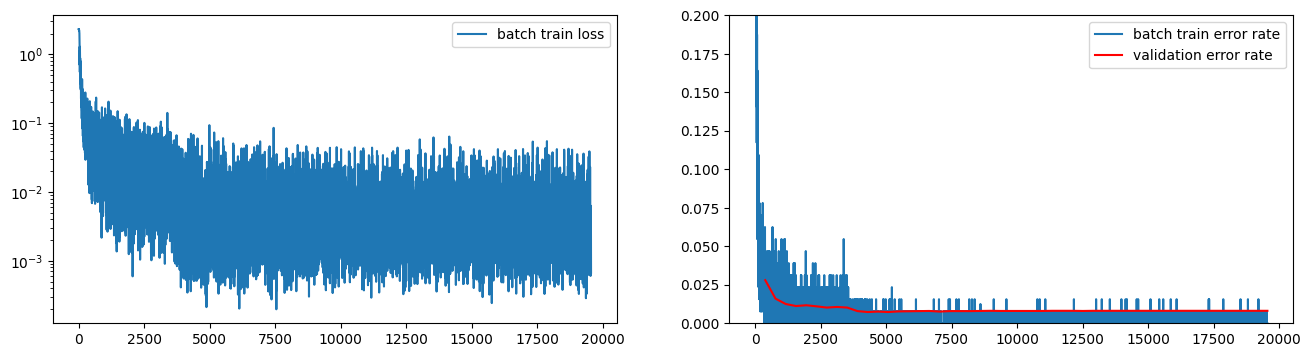

In [ ]:
model = ConvNet()

results = []
iters = 1

for _ in range(iters):
  t_start = time.time()
  SGD(model, mnist_loaders, alpha=0.01, epsilon=0.975, max_num_epochs=60, num_epochs=50,
      device='cuda', decay=0.0005, run_name="MNIST Before Data Augmentation")
  test_err_rate = compute_error_rate(model, mnist_loaders["test"])
  results.append(test_err_rate)

In [ ]:
transformTrain = torchvision.transforms.Compose(
    [
        # rotation, translation and scaling
        torchvision.transforms.RandomAffine(degrees=20, translate=(0.1,0.1), scale=(0.9, 1.1)),
        # flip horizontally with probability 0.1
        #torchvision.transforms.RandomHorizontalFlip(p=0.1),
        # adjust brightness, contrast, saturation, hue randomly
        torchvision.transforms.ColorJitter(brightness=0.25, contrast=0.25, saturation=0.25, hue=0.1),
        torchvision.transforms.ToTensor(),
        # normalization. mean and std seems to be most used values of MNIST
        torchvision.transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

transform  = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,)),
    ]
)
_test = torchvision.datasets.MNIST(
    data_path, train=False, download=True, transform=transform
)

_train2 = torchvision.datasets.MNIST(
    data_path, train=True, download=True, transform=transformTrain
)
#split data: until 50000 training and the rest is for validation
_train2.data = _train2.data[:50000]
_train2.targets = _train2.targets[:50000]

_valid = torchvision.datasets.MNIST(
    data_path, train=True, download=True, transform=transform
)
_valid.data = _valid.data[50000:]
_valid.targets = _valid.targets[50000:]

#
aug_mnist_loaders = {
    "train": InMemDataLoader(_train2, batch_size=batch_size, shuffle=True),
    "valid": InMemDataLoader(_valid, batch_size=batch_size, shuffle=False),
    "test": InMemDataLoader(_test, batch_size=batch_size, shuffle=False),
}

  0%|          | 0/50000 [00:00<?, ?it/s]

<ipython-input-5-f2b633125296>:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = [torch.tensor(t) for t in dataset[i]]


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

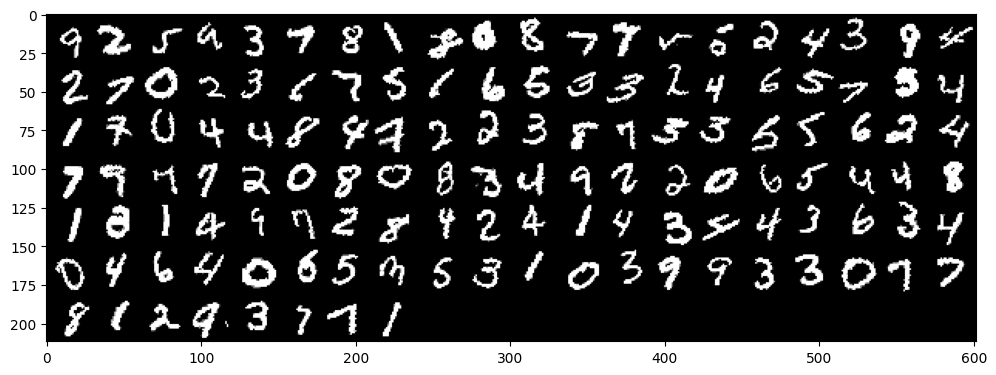

In [ ]:
images = list(aug_mnist_loaders["train"])[0][0].to("cpu")

grid = torchvision.utils.make_grid(images, nrow = 20, padding = 2)
plt.figure(figsize = (12, 12))
plt.imshow(np.transpose(grid, (1, 2, 0)))

----------------------------------------------------------
After epoch 50 | valid err rate:  0.58% | doing  50 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 12)



best_epoch,▁
error_rate,█▄█▇▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,█▄▇▅▂▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_error_rate,▇▆▅▇█▇▅▅▁▁▁▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,12
error_rate,0.0
loss,0.00607
val_error_rate,0.0058


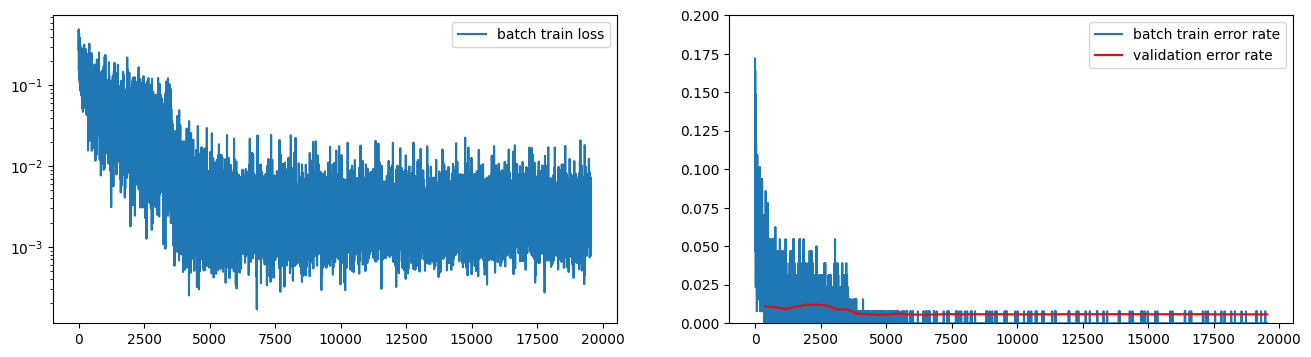

In [ ]:
for _ in range(iters):
  t_start = time.time()
  SGD(model, aug_mnist_loaders, alpha=0.01, epsilon=0.975, max_num_epochs=60, num_epochs=50,
      device='cuda', decay=0.0004, run_name="MNIST After Data Augmentation")
  test_err_rate = compute_error_rate(model, aug_mnist_loaders["test"])
  results.append(test_err_rate)

# Problem 7

----------------------------------------------------------
After epoch 50 | valid err rate:  1.58% | doing  50 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 19)



best_epoch,▁
error_rate,█▇▃▂▃▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,█▅▂▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_error_rate,█▇▅▄▂▃▃▂▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,19
error_rate,0.0
loss,0.01211
val_error_rate,0.0158


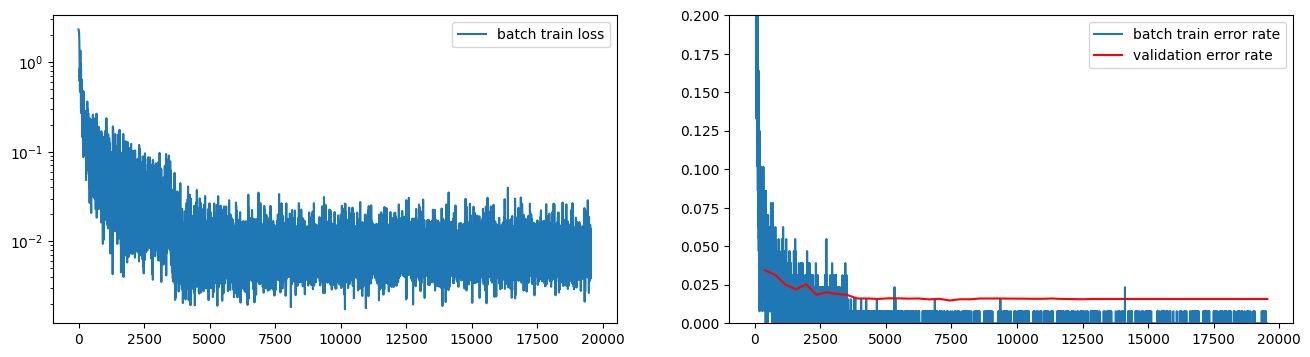

In [ ]:
model = Model(
    nn.Linear(28 * 28, 2000),
    nn.ReLU(),
    nn.Linear(2000, 800),
    nn.ReLU(),
    nn.Linear(800,10)
    )

modelNorm = Model(
    nn.Linear(28 * 28, 2000),
    # normalize the actions of the previous layer
    nn.BatchNorm1d(num_features=2000),
    nn.ReLU(),
    nn.Linear(2000, 800),
    nn.BatchNorm1d(num_features=800),
    nn.ReLU(),
    nn.Linear(800,10)
    )

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if 'weight' in name:
            p.normal_(0, 0.01)
        elif 'bias' in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)
    for name, p in modelNorm.named_parameters():
        if 'weight' in name:
            p.normal_(0, 0.01)
        elif 'bias' in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)


t_start = time.time()
SGD(model, mnist_loaders, alpha=0.01, epsilon=0.975, max_num_epochs=60, num_epochs=50,
      device='cuda', decay=0.0005, run_name="Before Batch Normalization")
test_err_rate = compute_error_rate(model, mnist_loaders["test"])

----------------------------------------------------------
After epoch 50 | valid err rate:  1.30% | doing  50 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 28)



wandb: ERROR Control-C detected -- Run data was not synced


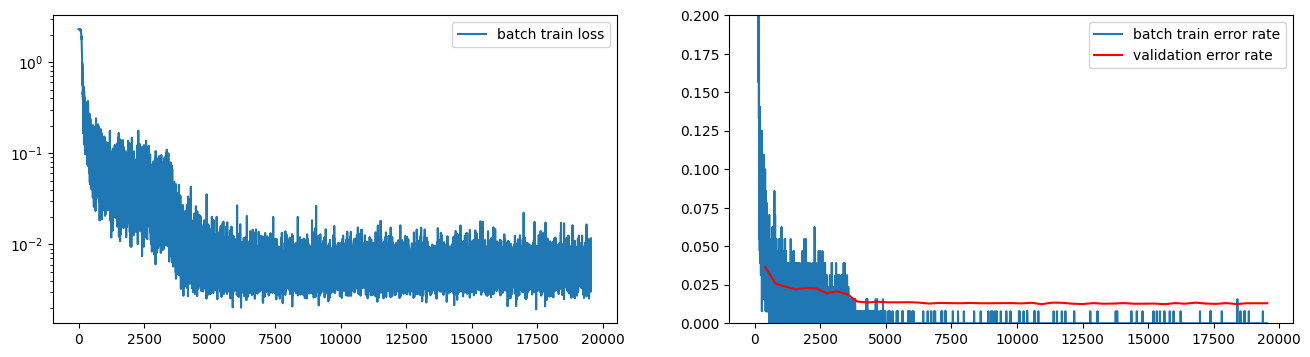

In [ ]:
SGD(modelNorm, mnist_loaders, alpha=0.01, epsilon=0.975, max_num_epochs=60, num_epochs=50,
      device='cuda', decay=0.0005, run_name="After Batch Normalization")
test_err_rate_NORM = compute_error_rate(modelNorm, mnist_loaders["test"])

# Problem 8

----------------------------------------------------------
After epoch 50 | valid err rate:  1.60% | doing  50 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 29)



best_epoch,▁
error_rate,██▅▅▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,█▇▄▅▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_error_rate,█▆▂▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,29
error_rate,0.0
loss,0.00087
val_error_rate,0.016


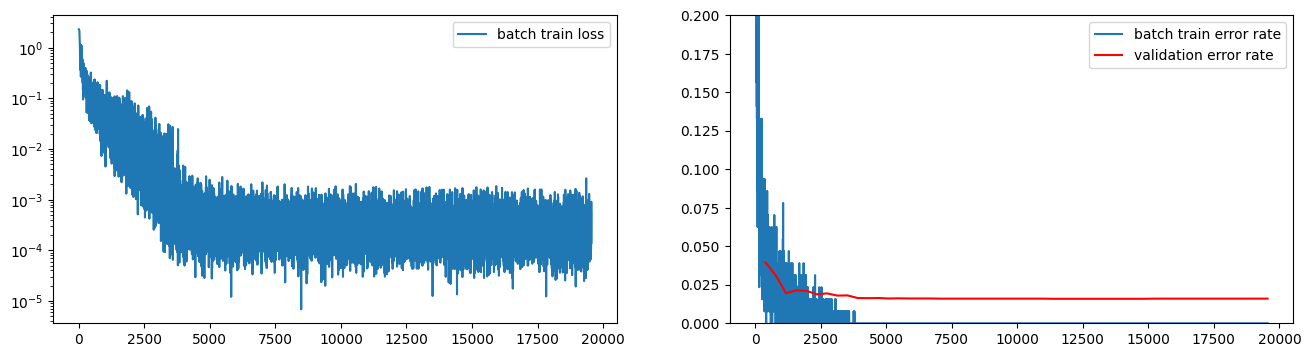

In [ ]:
model = Model(
    nn.Linear(28 * 28, 2000),
    nn.ReLU(),
    nn.Linear(2000, 800),
    nn.ReLU(),
    nn.Linear(800,10)
    )
with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if 'weight' in name:
            p.normal_(0, 0.01)
        elif 'bias' in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

SGD(model, mnist_loaders, alpha=0.01, epsilon=0.975, max_num_epochs=60, num_epochs=50,
      device='cuda', decay=0.0005, use_norm=True, run_name="Norm Constraints")
test_err_rate = compute_error_rate(model, mnist_loaders["test"])

# Problem 9

In [ ]:
firstLayerRange = (500,3500)
secondLayerRange = (200,1600)
alphaDecreaseRange = (2,10)
alphaRange = np.logspace(-4,-1,6)

iters = 15
results = []

----------------------------------------------------------
After epoch 25 | valid err rate:  1.58% | doing  25 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 13)



best_epoch,▁
error_rate,█▃▂▂▂▂▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,█▃▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_error_rate,█▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,13
error_rate,0.0
loss,0.00306
val_error_rate,0.0158


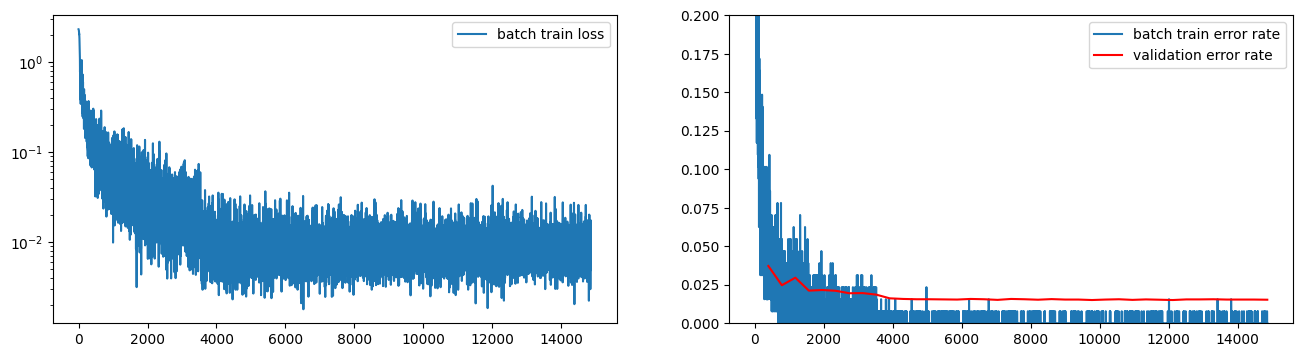

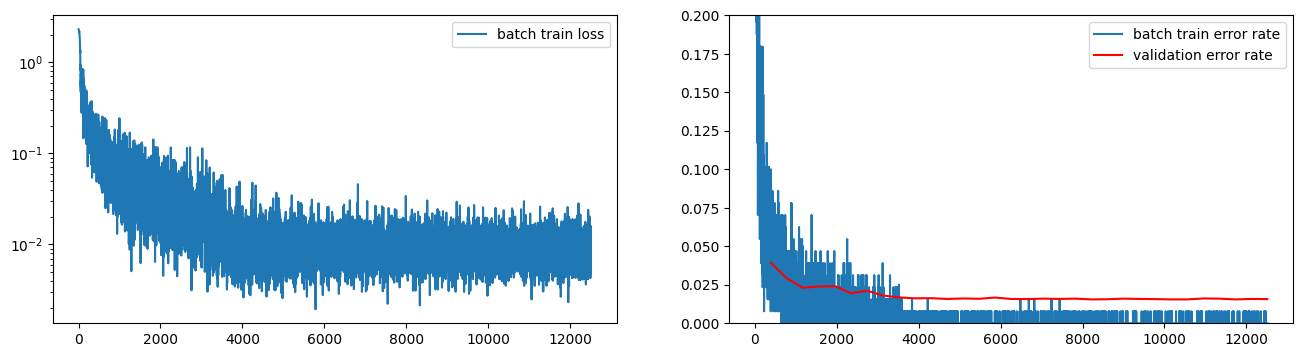

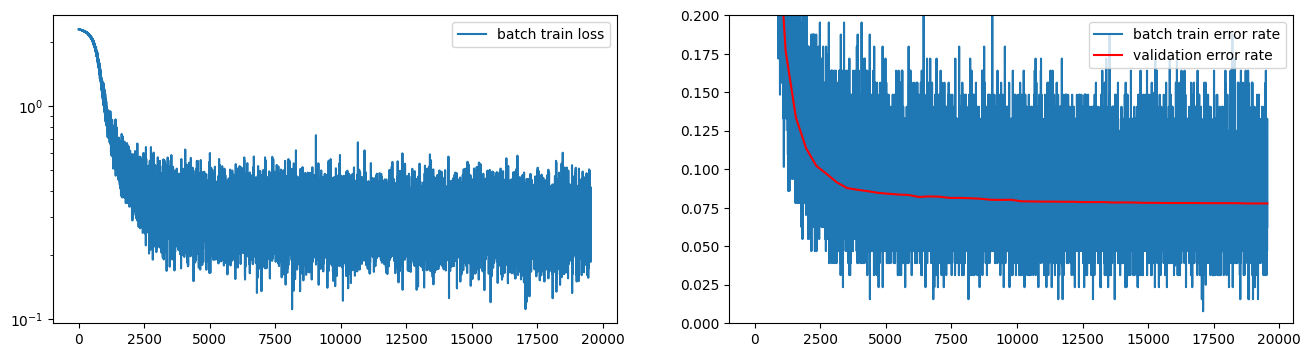

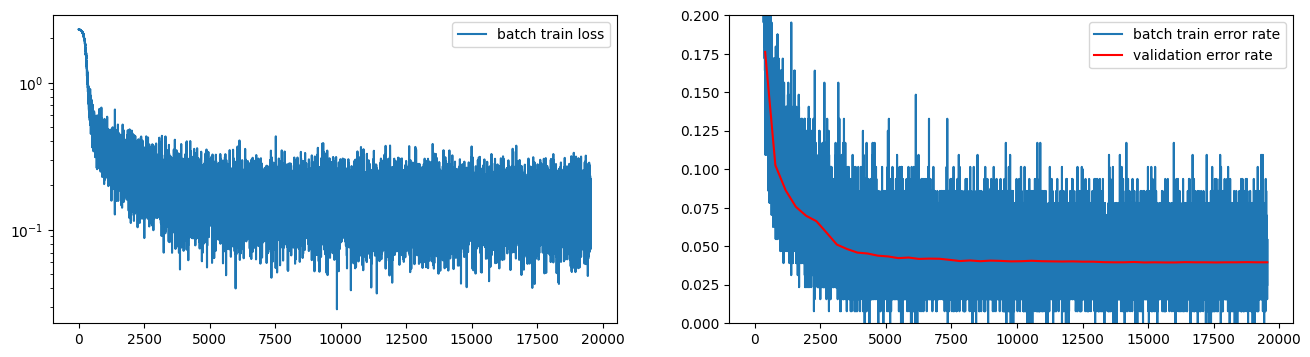

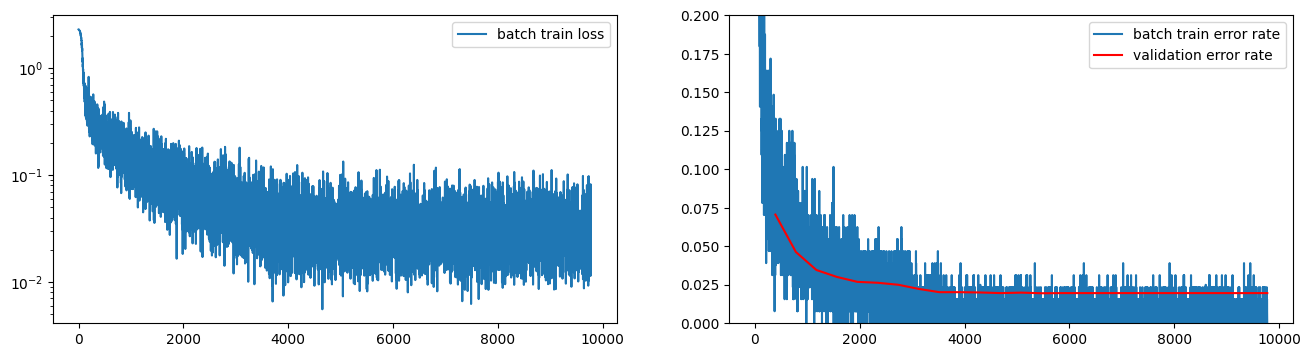

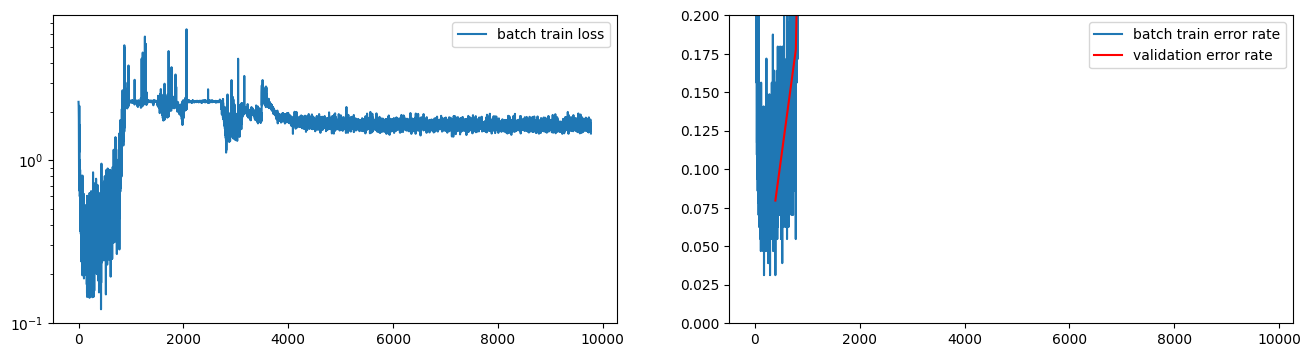

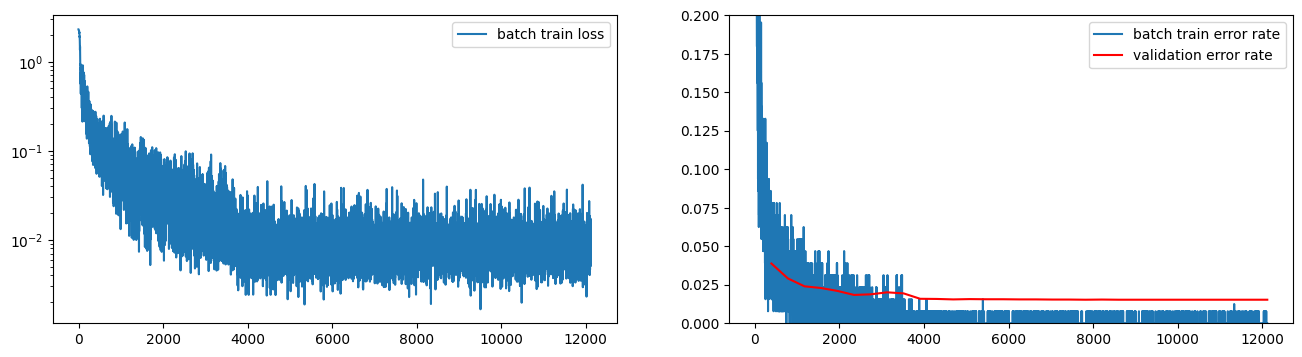

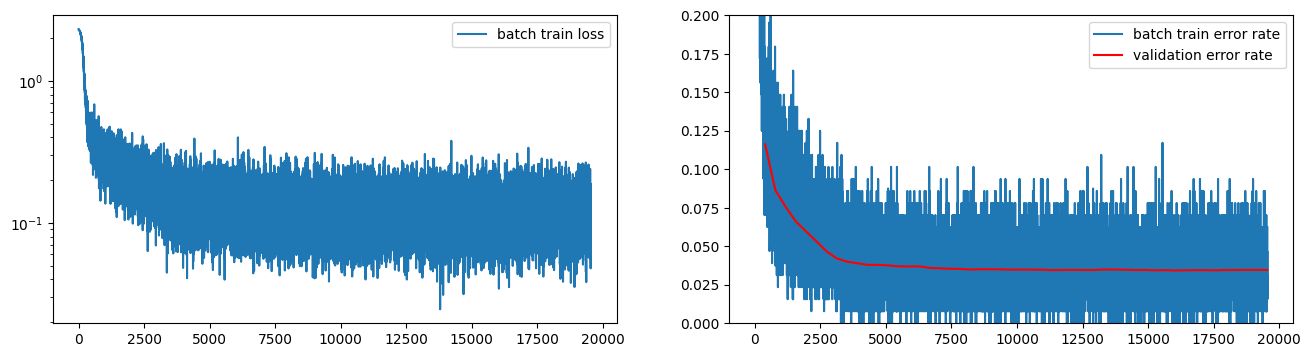

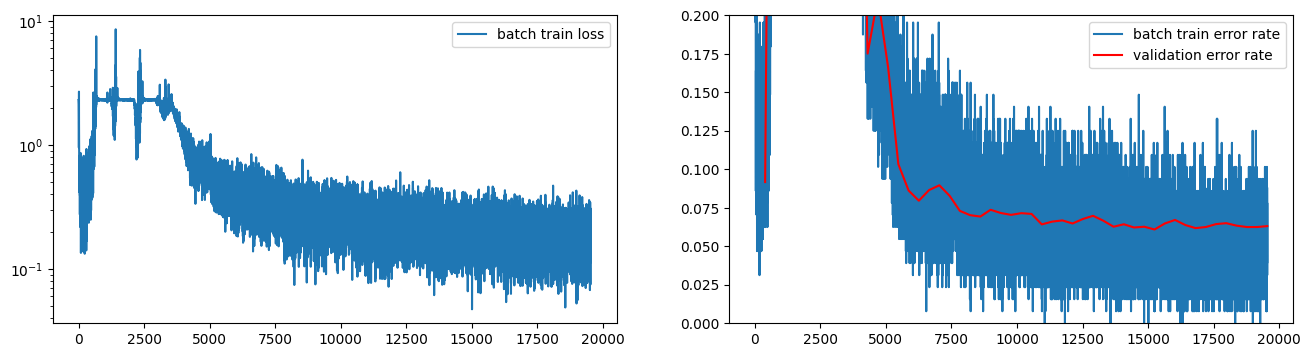

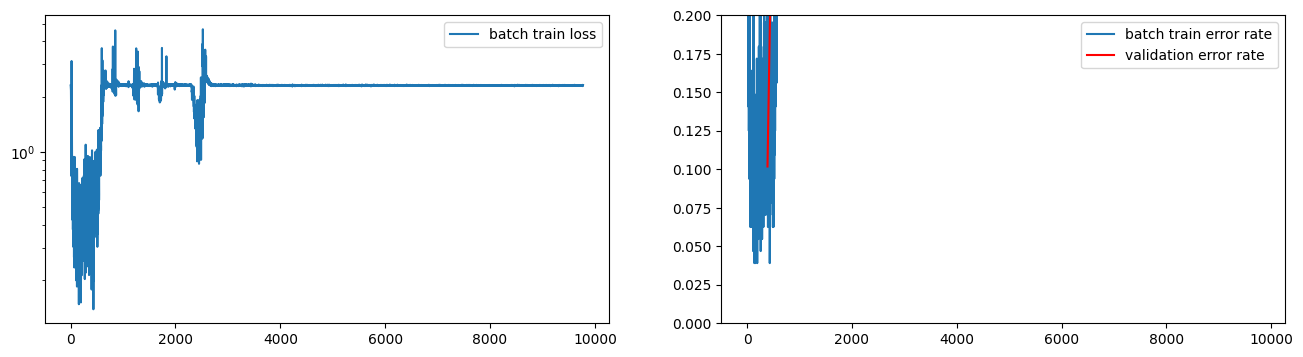

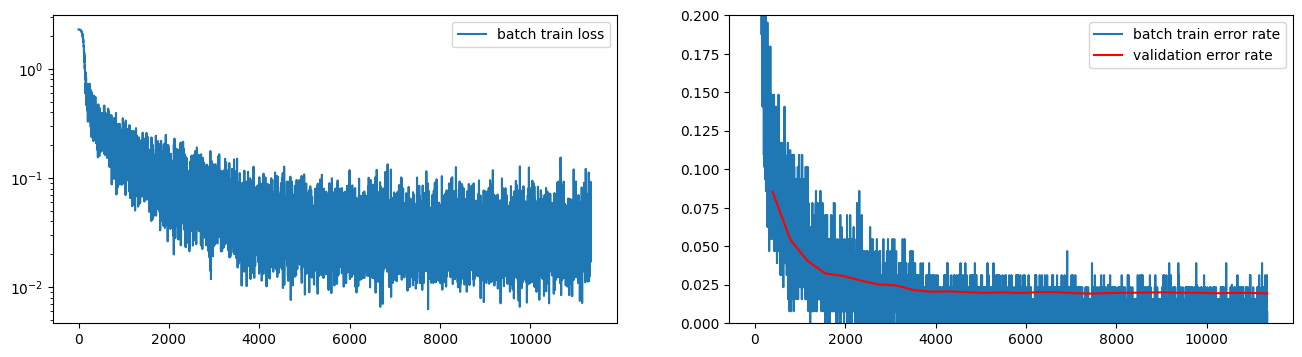

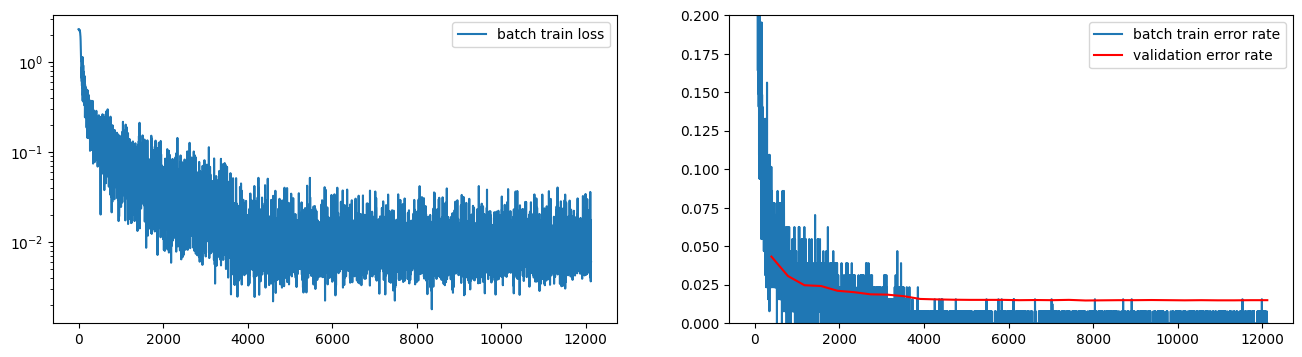

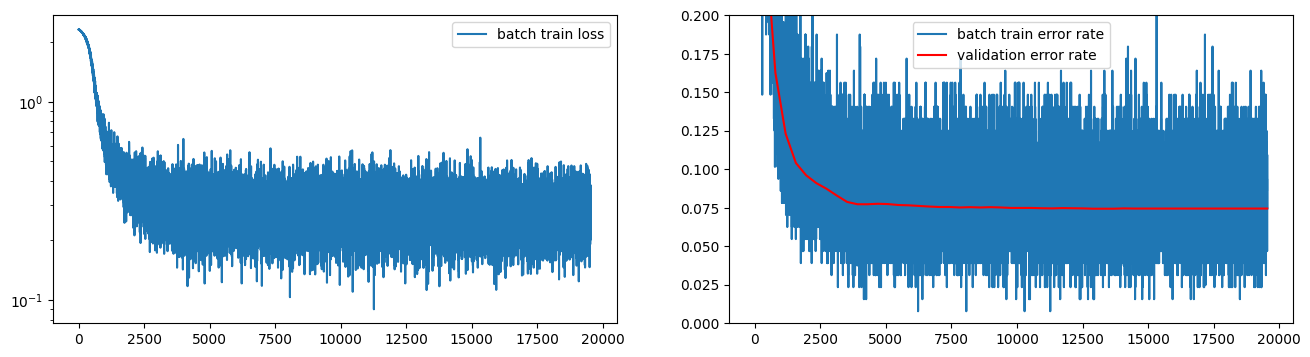

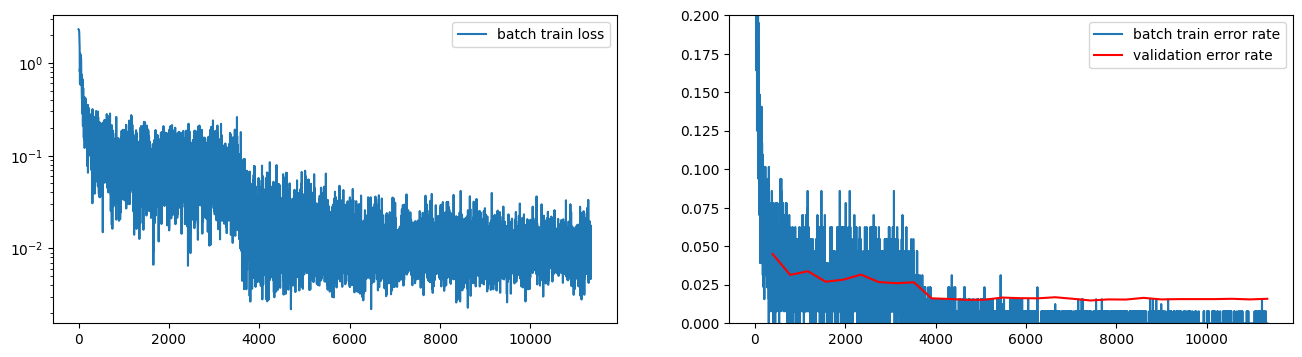

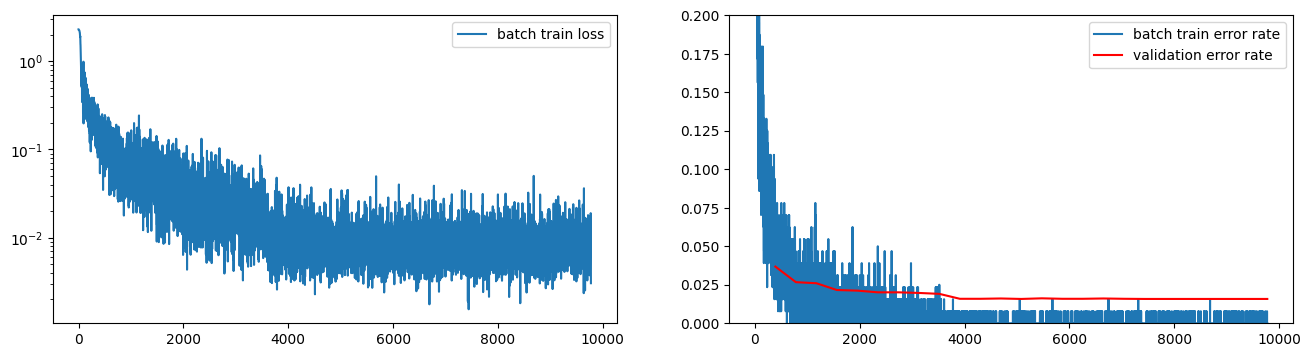

In [ ]:
for _ in range(iters):
  # sample hyperparameters
  layer1 = np.random.randint(firstLayerRange[0], firstLayerRange[1])
  layer2 = np.random.randint(secondLayerRange[0], secondLayerRange[1])
  alphaDecrease = np.random.randint(alphaDecreaseRange[0], alphaDecreaseRange[1])
  alpha = np.random.choice(alphaRange)

  params = (layer1,layer2,alphaDecrease,alpha)
  model = Model(
      nn.Linear(28 * 28, layer1),
      nn.ReLU(),
      nn.Linear(layer1, layer2),
      nn.ReLU(),
      nn.Linear(layer2,10)
      )

  with torch.no_grad():
      for name, p in model.named_parameters():
          if 'weight' in name:
              p.normal_(0, 0.01)
          elif 'bias' in name:
              p.zero_()
          else:
              raise ValueError('Unknown parameter name "%s"' % name)

  SGD(model, mnist_loaders, alpha=alpha, epsilon=0.975, max_num_epochs=50, num_epochs=25,
        device='cuda', decay=0.0005, use_norm=False, alpha_decrease=alphaDecrease, run_name=f"Pruning_{params}")
  test_err_rate = compute_error_rate(model, mnist_loaders["test"])
  results.append((test_err_rate,params))

In [ ]:
print(min(results))

(0.0148, (643, 1233, 8, 0.025118864315095794))


# Problem 10

----------------------------------------------------------
After epoch 50 | valid err rate:  1.41% | doing  50 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 27)



best_epoch,▁
error_rate,█▁▁█▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,▅▂▅▇▄▃█▁▂▂▂▃▂▂▂▂▂▂▃▂▂▂▂▂▂▂▂▃▁▃▂▂▂▃▂▃▂▁▂▂
val_error_rate,▇▅█▆▆▃▇▄▂▁▁▁▂▂▂▁▁▂▂▁▁▁▁▁▁▁▁▂▁▁▂▂▂▁▂▂▁▁▁▁
best_epoch,27
error_rate,0.0
loss,0.00667
val_error_rate,0.0141


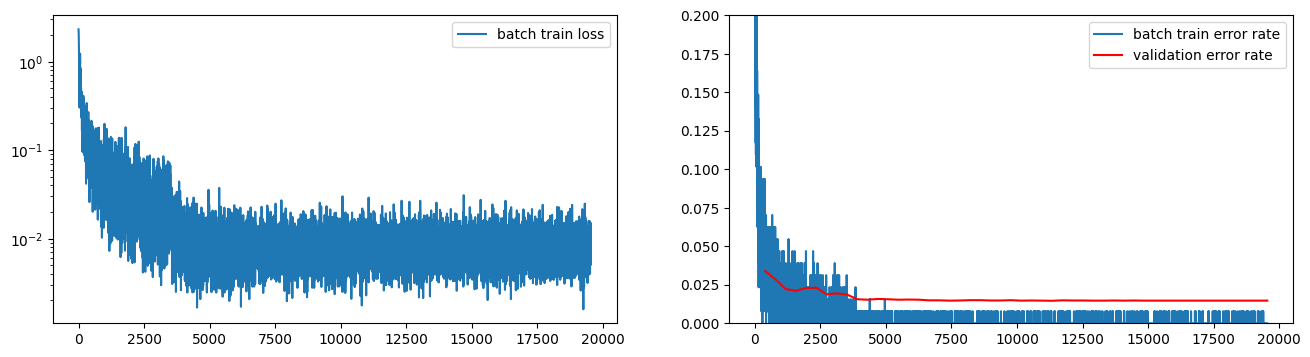

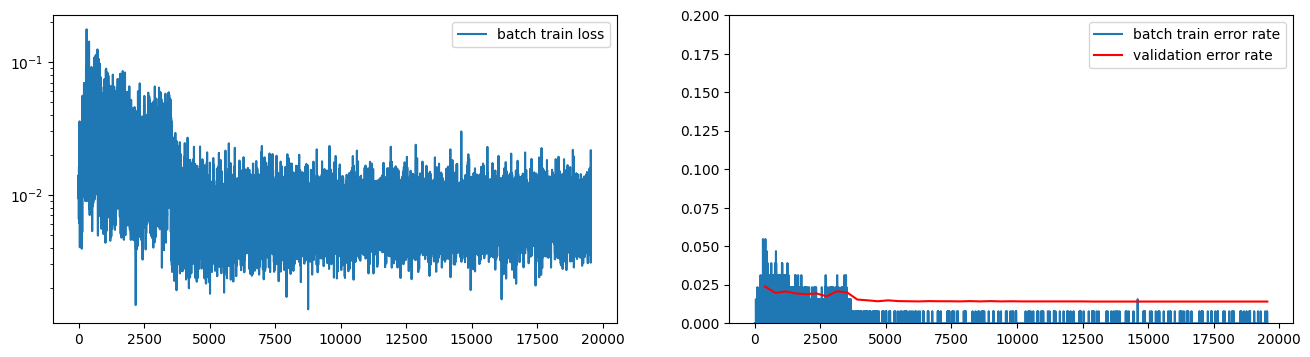

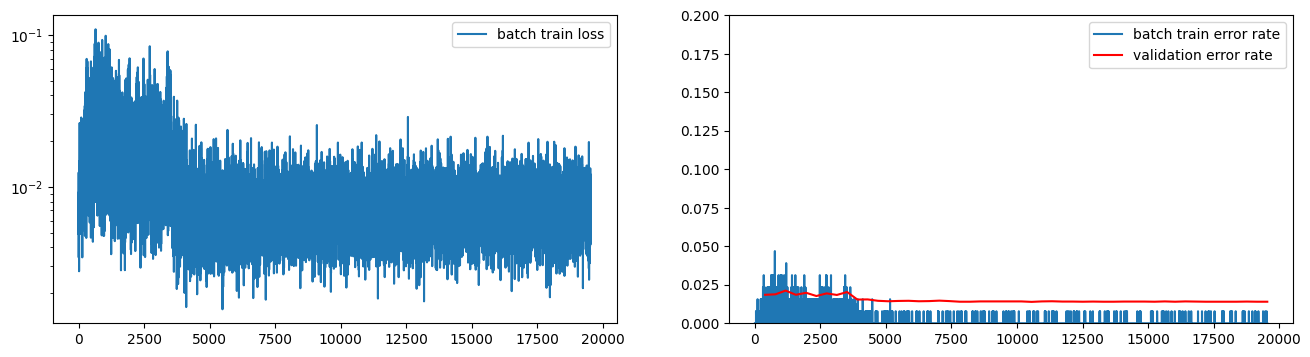

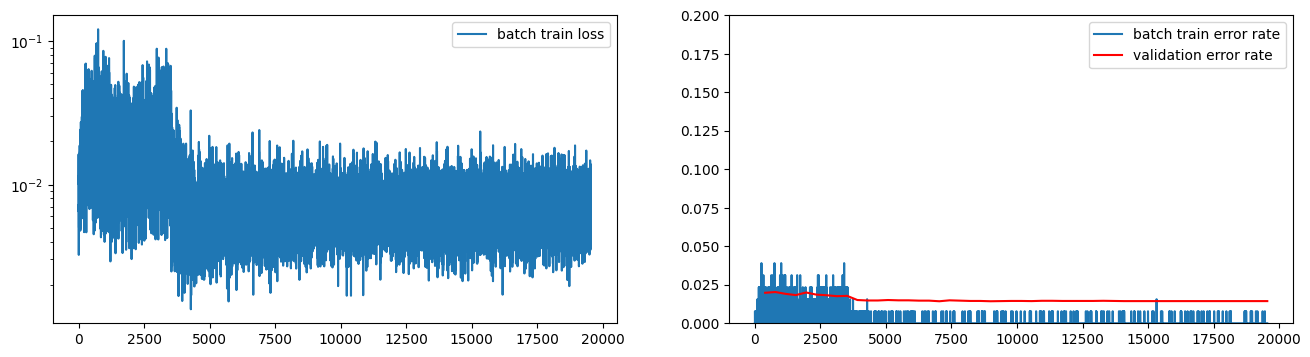

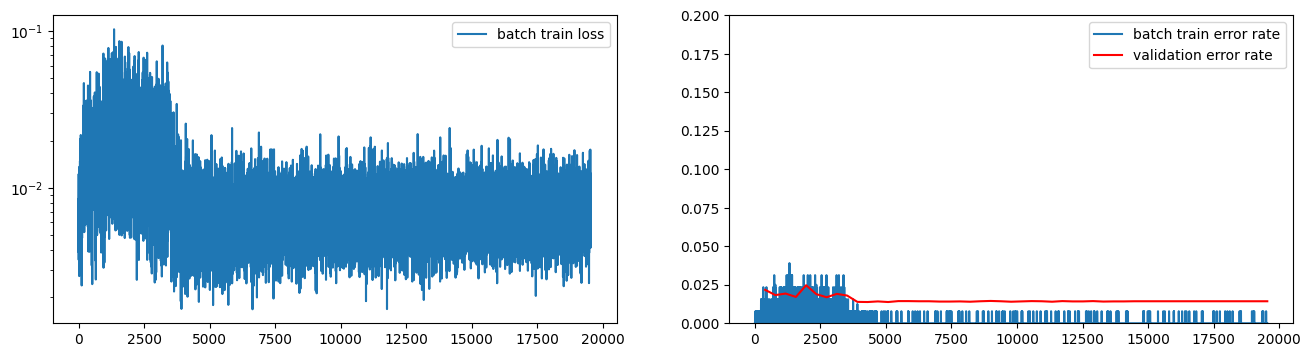

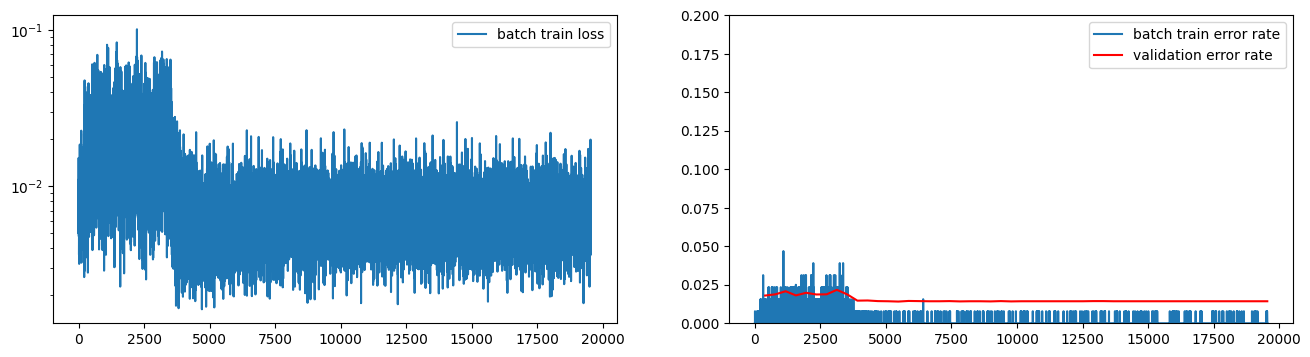

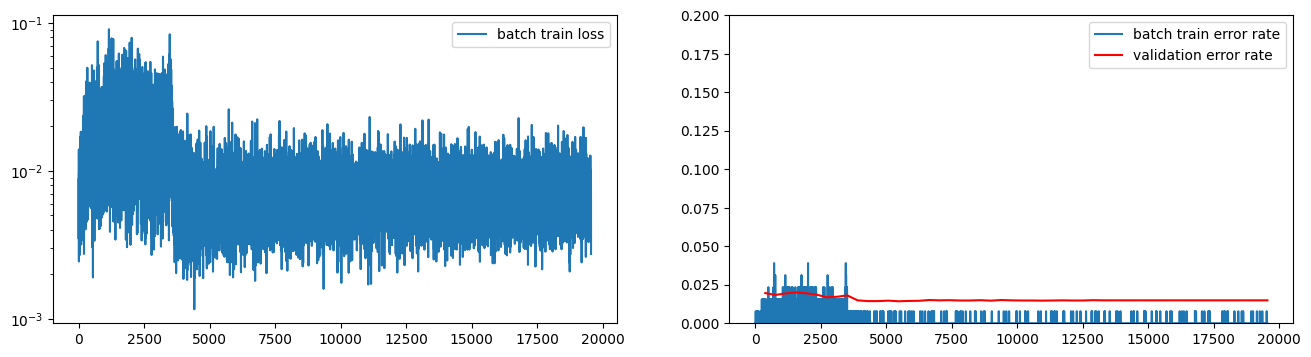

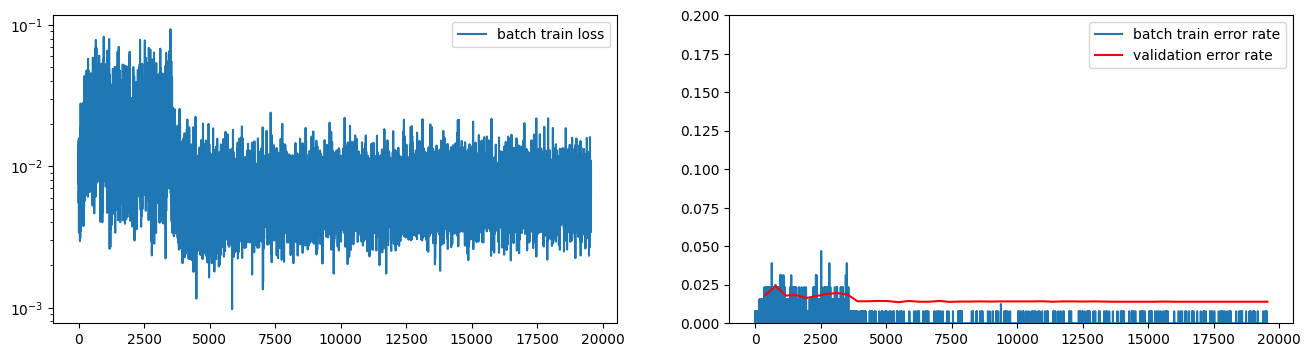

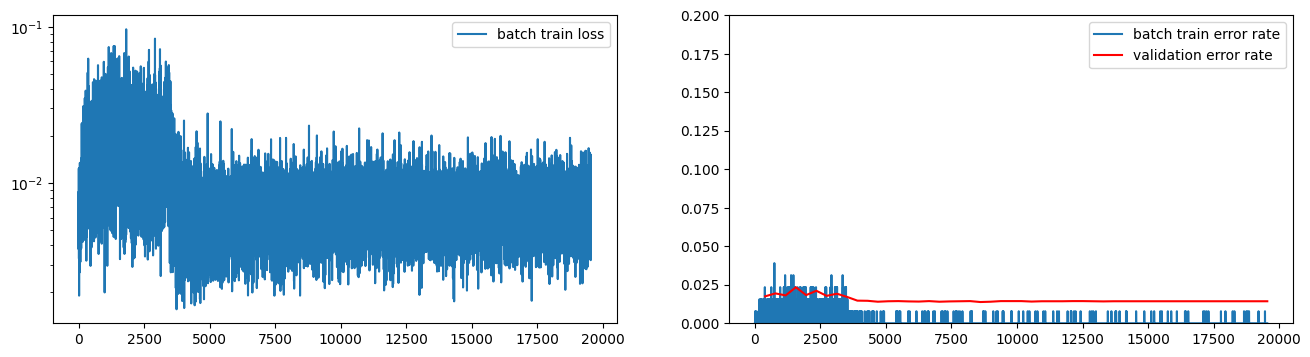

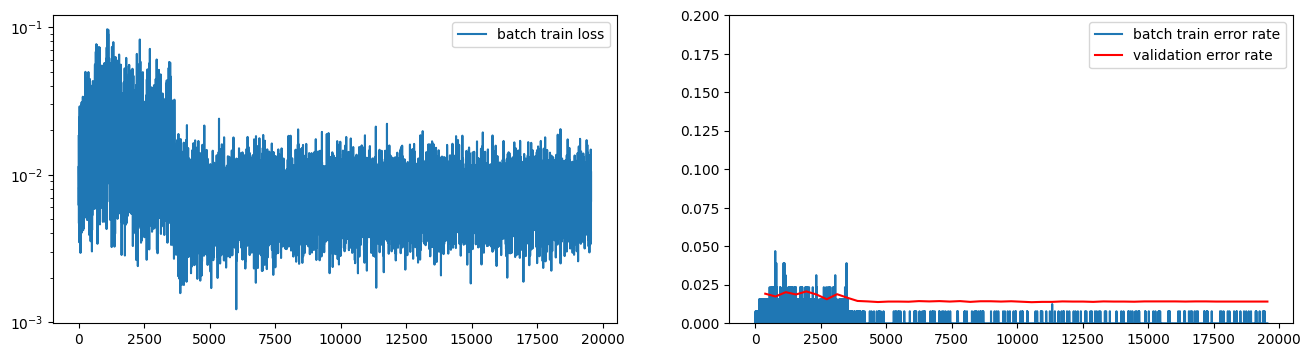

In [12]:
model = Model(
    nn.Linear(28 * 28, 2000),
    nn.ReLU(),
    nn.Linear(2000, 800),
    nn.ReLU(),
    nn.Linear(800,10)
    )

iterations = 5
results = []
for iter in range(iterations):
    SGD(model, mnist_loaders, alpha=0.01, epsilon=0.975, max_num_epochs=60, num_epochs=50,
        device='cuda', decay=0.0005, run_name="Pruning_Before")

    with torch.no_grad():
        # Initialize parameters
        for name, p in model.named_parameters():
            if 'weight' in name:
                # takes the absolute values of p and sort them
                sorted_weights, _ = torch.sort(torch.abs(p.view(-1)))
                # determine where we will cutoff for pruning
                cutoff_index = int(0.5 * len(sorted_weights))
                # value of the cutoff index will serve as threshold
                threshold = sorted_weights[cutoff_index]
                # if absolute value less then threshold, set them to 0
                p.data[p.abs() < threshold] = 0
            elif 'bias' in name:
                p.zero_()
            else:
                raise ValueError('Unknown parameter name "%s"' % name)

    SGD(model, mnist_loaders, alpha=0.01, epsilon=0.975, max_num_epochs=60, num_epochs=50,
        device='cuda', decay=0.0005, run_name="Pruning_After")
    test_err_rate = compute_error_rate(model, mnist_loaders["test"])
    results.append((test_err_rate,iter))

In [13]:
print(min(results))

(0.0138, 4)
